$J(\theta) = -\ell(\theta) + \lambda R(\theta) \to \min$

$\ell(\theta) =  \sum_{i=1}^N [ y_i \log \sigma(x_i \cdot \theta) + (1-y_i)\log(1 - \sigma(x_i \cdot \theta))]$

In [440]:
σ(z) = 1 ./ (1 .+ exp.(-z)) # sigmoid / logistic function
σ(0.5)

0.6224593312018546

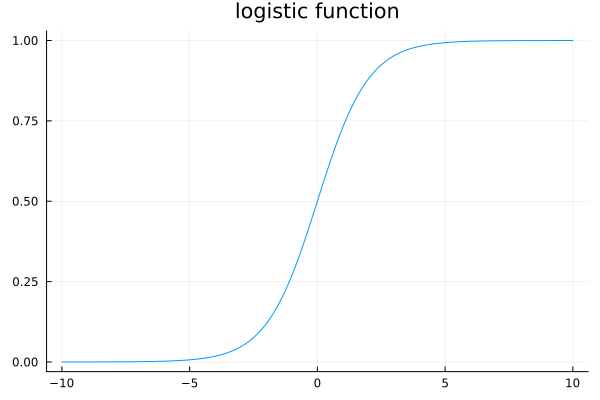

In [441]:
using Plots
z = -10:0.01:10
v = σ(z)
plot(z, v, legend=false, title="logistic function")

Read data from files

In [443]:
using DelimitedFiles
function readWDBC(path, numfeatures=10)
    A = readdlm(path, ',')
    y = A[:, 2]
    X = A[:, 3:3+numfeatures-1]   
    (X, y)
end
path = "/home/minhhn/Documents/ML/Dataset/Breast_Cancer/wdbc.txt"
D = 30
X ,y = readWDBC(path, D)

([17.99 10.38 … 0.4601 0.1189; 20.57 17.77 … 0.275 0.08902; … ; 20.6 29.33 … 0.4087 0.124; 7.76 24.54 … 0.2871 0.07039], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

Sigmoid --> 0 very fast

Normalization

In [444]:
using Statistics
N = size(X, 1)
μ = mean(X, dims=1)

1×30 Matrix{Float64}:
 14.1273  19.2896  91.969  654.889  …  0.114606  0.290076  0.0839458

In [445]:
s = std(X, dims=1)

1×30 Matrix{Float64}:
 3.52405  4.30104  24.299  351.914  …  0.0657323  0.0618675  0.0180613

In [446]:
X0 = (X - repeat(μ, N, 1)) ./ repeat(s, N, 1)

569×30 Matrix{Float64}:
  1.0961     -2.07151    1.26882    …   2.29406    2.7482      1.93531
  1.82821    -0.353322   1.68447        1.08613   -0.243675    0.280943
  1.5785      0.455786   1.56513        1.95328    1.15124     0.201214
 -0.768233    0.253509  -0.592166       2.17387    6.04073     4.93067
  1.74876    -1.1508     1.77501        0.728618  -0.86759    -0.396751
 -0.475956   -0.834601  -0.386808   …   0.905091   1.75253     2.23983
  1.16988     0.160508   1.13712        1.19566    0.262245   -0.0147175
 -0.118413    0.358135  -0.0728028      0.623647   0.477221    1.72492
 -0.319885    0.588312  -0.183919       1.39039    2.38776     1.28752
 -0.473118    1.10447   -0.329192       1.61859    2.36836     6.84084
  ⋮                                 ⋱                         
 -0.0219327   1.82755   -0.0242411  …  -0.149184  -1.05185    -0.0407401
 -0.830662    2.3437    -0.87654       -1.74353   -2.15744    -1.37841
  0.310072    2.63433    0.47043        1.8407     1.9

In [447]:
function normalize(X)
    μ = mean(X, dims=1)
    s = std(X, dims=1)
    N = size(X, 1)
    X0 = (X - repeat(μ, N, 1)) ./ repeat(s, N, 1)
    (X0, μ, s)
end
X0, μ, s = normalize(X)

([1.0960995294317142 -2.0715123022444266 … 2.748204114212152 1.935311742060108; 1.828211973734362 -0.35332152255009075 … -0.2436752590262722 0.2809427865045193; … ; 1.8367249091332305 2.334403161247815 … 1.917395903599213 2.217683953349716; -1.8068114415822716 1.2207179332727314 … -0.04809589427108617 -0.750546291206345], [14.127291739894556 19.289648506151146 … 0.2900755711775044 0.08394581722319863], [3.5240488262120775 4.30103576816695 … 0.06186746753751869 0.01806126734889399])

BGD

In [485]:
function J(X, y, θ, λ=0.)
    u = σ(X*θ)
    R = θ'*θ # incliding θ_0
    N = length(y)
    val = -(y'*log.(u) + (1 .- y)'*log.(1 .- u))/N + λ*R
    return val
end

J(X0, y, rand(D))

6.1029205954603585

In [449]:
function ∇J(X, y, θ, λ=0)
    u = σ(X*θ)
    N = length(y)
    X'*(u - y)/N + 2*λ*θ
end

∇J (generic function with 2 methods)

In [450]:
∇J(X0, y, ones(31))

DimensionMismatch: DimensionMismatch: second dimension of A, 30, does not match length of x, 31

In [451]:
function bgd(X, y, θ_start, α, T=10000)
    θ = θ_start
    θs = []
    for t=1:T
        θ = θ - α*∇J(X, y, θ)
        push!(θs, θ)
    end
    return θs
end

bgd (generic function with 4 methods)

In [452]:
θ_start = zeros(D+1)
θs = bgd(X, y, θ_start, 0.01)
J(X, y, θs[end])

DimensionMismatch: DimensionMismatch: second dimension of A, 30, does not match length of x, 31